In [1]:
import subprocess
import sys
from tqdm import tqdm

print("⏳ Checking and installing all required dependencies for the experiment...")

def install(package_list, is_torch_stack=False):
    """
    Installs a list of packages using pip.
    For the PyTorch stack, it uses a specific index URL.
    """
    try:
        command = [sys.executable, "-m", "pip", "install", "--quiet"]
        if is_torch_stack:
            command.extend(["--index-url", "https://download.pytorch.org/whl/cu121"])
        
        command.extend(package_list)
        subprocess.check_call(command)
        return True
    except subprocess.CalledProcessError as e:
        print(f"\n❌ Failed to install {' '.join(package_list)}. Error: {e}")
        return False

try:
    # Step 1: Clean up any existing conflicting installations for a clean slate.
    print("\n[Step 1/4] Cleaning up existing PyTorch installations...")
    subprocess.run([sys.executable, "-m", "pip", "uninstall", "-y",
                    "torch", "torchvision", "torchaudio", "torchtext", "torchdata"],
                   capture_output=True)

    # Step 2: Install the entire PyTorch stack in a single command.
    # This is the most robust way to ensure CUDA version compatibility across all packages.
    print("\n[Step 2/4] Installing PyTorch, Torchvision, and Torchaudio for CUDA 12.1...")
    
    # We install torch, torchvision, and torchaudio together to ensure pip resolves
    # their dependencies correctly for the specified CUDA version.
    torch_stack = [
        "torch==2.1.1",
        "torchvision==0.16.1",
        "torchaudio==2.1.1"
    ]
    if not install(torch_stack, is_torch_stack=True):
        print("   -> Critical PyTorch installation failed. Aborting.")
        sys.exit(1)
    
    # Step 3: Install the remaining, non-CUDA-dependent PyTorch ecosystem packages.
    print("\n[Step 3/4] Installing remaining Torch ecosystem packages...")
    torch_ecosystem_packages = [
        ["torchtext==0.16.1"],
        ["torchdata==0.7.1"]
    ]
    for package in tqdm(torch_ecosystem_packages, desc="Installing Torch ecosystem"):
        if not install(package):
            sys.exit(1)
            
    # Step 4: Install all other scientific computing packages.
    print("\n[Step 4/4] Installing basic scientific packages...")
    basic_packages = [
        ["numpy==1.26.0"], ["pandas==2.1.1"], ["scikit-learn==1.3.2"],
        ["scipy==1.11.3"], ["matplotlib==3.8.0"], ["seaborn==0.13.0"],
        ["statsmodels==0.14.1"], ["tqdm==4.66.1"]
    ]
    for package in tqdm(basic_packages, desc="Installing basic packages"):
        if not install(package):
            sys.exit(1)

    print("\n✅ All specified dependencies are installed.")

except Exception as e:
    print(f"❌ An unexpected error occurred during installation: {e}")
    sys.exit(1)

# --- Final Verification Step ---
try:
    print("\n🔍 Testing library imports...")
    import numpy, pandas, torch, torchvision, torchtext, torchaudio, torchdata
    import sklearn, scipy, matplotlib, seaborn, statsmodels
    import tqdm as TQDM

    print("\n✅ Setup complete! Library versions:")
    print(f"   - NumPy:        {numpy.__version__}")
    print(f"   - Pandas:       {pandas.__version__}")
    print(f"   - PyTorch:      {torch.__version__}")
    print(f"   - Torchvision:  {torchvision.__version__}")
    print(f"   - Torchaudio:   {torchaudio.__version__}")
    print(f"   - Scikit-learn: {sklearn.__version__}")
    print(f"   - Statsmodels:  {statsmodels.__version__}")
    
    print(f"\n🔧 PyTorch Configuration:")
    cuda_available = torch.cuda.is_available()
    print(f"   - CUDA Available:    {'✓ Yes' if cuda_available else '✗ No'}")
    if cuda_available:
        print(f"   - CUDA Device Count: {torch.cuda.device_count()}")
        print(f"   - Current Device:    {torch.cuda.current_device()}")
        print(f"   - Device Name:       {torch.cuda.get_device_name(0)}")
        # This check is now internal to the verification step.
        torchvision.ops.nms(torch.rand(1,4).cuda(), torch.rand(1).cuda(), 0.5)
        print("   - Torchvision CUDA linkage: ✓ Verified")


except ImportError as e:
    print(f"\n❌ Critical library import failed: {e}")
    sys.exit(1)
except Exception as e:
    print(f"\n❌ Unexpected error during testing: {e}")
    sys.exit(1)

print("\n🎉 Environment setup completed successfully!")
print("You can now run your machine learning experiments.")

⏳ Checking and installing all required dependencies for the experiment...

[Step 1/4] Cleaning up existing PyTorch installations...

[Step 2/4] Installing PyTorch, Torchvision, and Torchaudio for CUDA 12.1...



[Step 3/4] Installing remaining Torch ecosystem packages...


Installing Torch ecosystem: 100%|██████████| 2/2 [00:04<00:00,  2.47s/it]



[Step 4/4] Installing basic scientific packages...


Installing basic packages: 100%|██████████| 8/8 [00:43<00:00,  5.44s/it]



✅ All specified dependencies are installed.

🔍 Testing library imports...

✅ Setup complete! Library versions:
   - NumPy:        1.26.0
   - Pandas:       2.1.1
   - PyTorch:      2.1.1+cu121
   - Torchvision:  0.16.1+cu121
   - Torchaudio:   2.1.1+cu121
   - Scikit-learn: 1.3.2
   - Statsmodels:  0.14.1

🔧 PyTorch Configuration:
   - CUDA Available:    ✓ Yes
   - CUDA Device Count: 1
   - Current Device:    0
   - Device Name:       NVIDIA RTX A6000
   - Torchvision CUDA linkage: ✓ Verified

🎉 Environment setup completed successfully!
You can now run your machine learning experiments.


--- Running in 'fixed_panel' mode. ---
--- All results will be saved in: ./experiment_results_20250812/results_fixed_panel/ ---
--- Found 87 completed runs. Resuming experiment. ---

--- Pre-loading datasets... ---
Files already downloaded and verified
Files already downloaded and verified

--- Launching Full Protocol: 3 remaining experiments to run ---


Processing Run: resnet-m4-cifar-n100-s42: 100%|██████████| 3/3 [41:45<00:00, 835.26s/it]



--- Experimentation complete. Launching final analysis. ---
--- Analysis based on 90 total completed runs. ---

       ENHANCED STATISTICAL ANALYSIS

1. HIERARCHICAL LINEAR MODELING (Controls for Architecture)
------------------------------------------------------------

--- Final Accuracy vs. Pre-Training Metrics ---
            Coef.       Std.Err.       z  P>|z|          [0.025         0.975]
Intercept   0.000  262029866.756   0.000  1.000  -513569101.715  513569101.715
lce        -9.424          2.861  -3.294  0.001         -15.031         -3.817
lpa        -0.006          2.864  -0.002  0.998          -5.620          5.608
Group Var   0.000                                                             

--- Final Stability (TBD Std Dev) vs. Pre-Training Metrics ---
                 Coef.  Std.Err.       z  P>|z|    [0.025    0.975]
Intercept      933.096   664.091   1.405  0.160  -368.497  2234.690
lce            -57.065   129.026  -0.442  0.658  -309.951   195.822
lpa             

TypeError: regplot() got an unexpected keyword argument 'hue'

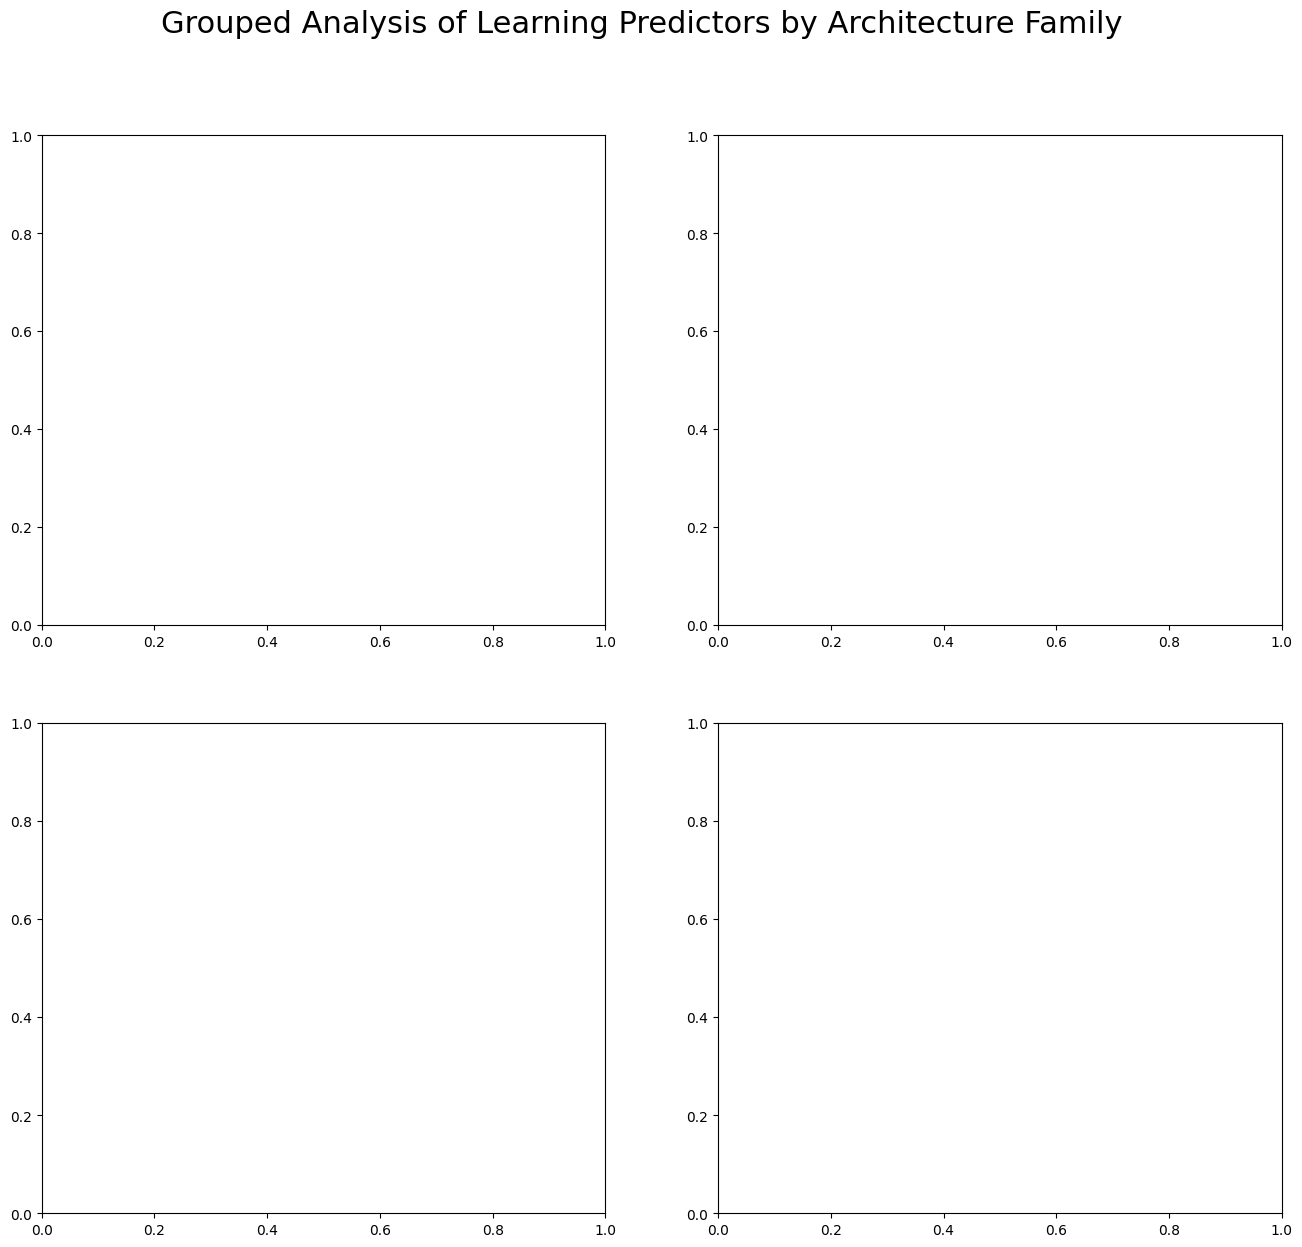

In [2]:
# ===================================================================
#
# Role of Architecture on the Predictive Power of Initial Task Geometry
#
# ===================================================================
#
# Scientific Goal:
# To establish and empirically validate a framework linking the initial
# geometric properties of a machine learning task to the final performance and
# dynamical stability of the learned network. We test this
# framework across diverse architectural families (Plain CNNs, ResNets) and
# data modalities (CIFAR-10, MNIST), sampling a wide variety of model depths,
# widths, and other hyperparameters.
#
# Methodology:
# This script supports two distinct experimental designs, controlled by the
# `SAMPLING_STRATEGY` variable:
#
# 1. 'population_sampling': For each experimental condition (e.g., ResNet on
#    CIFAR-10 with 25% noise), we generate a new, random population of models.
#    This design tests the universality of our metrics across the entire space
#    of possible architectures.
#
# 2. 'fixed_panel': We first generate a fixed panel of diverse architectures.
#    Then, each specific architecture in this panel is tested across all task
#    difficulties. This design isolates the effect of task difficulty for a
#    constant architecture.
#
# For each individual experiment, we follow a three-stage process:
# 1. Pre-Training Assessment: A unique architecture is generated. Its initial
#    geometric properties are measured using Local Class Entropy (LCE) and
#    Linear Probe Accuracy (LPA).
# 2. Dynamical Simulation: The same architecture is trained on a specific task.
#    We record its final accuracy and the full history of its Total Bulk
#    Deformation (TBD) to analyze its dynamics.
# 3. Outcome Extraction: From the dynamics, we calculate the final geometric
#    stability (Asymptotic TBD Std Dev), the learning speed (Relaxation
#    Time Constant τ), and the total "energy" injected (Total TBD).
#
# All results, including the specific generated parameters for each model,
# are saved incrementally to a CSV file for robustness and analysis.
#
# ===================================================================

import os
import random
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from torch.cuda.amp import autocast, GradScaler
from tqdm import tqdm
from datetime import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from scipy.stats import entropy, pearsonr
from scipy.optimize import curve_fit
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
from statsmodels.stats.multitest import multipletests
import csv
import sys
import logging

# --- Global Setup ---
warnings.filterwarnings("ignore")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pd.set_option('display.width', 140)
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb:256'

def set_random_seed(seed: int):
    """Sets the random seed for all libraries for reproducibility."""
    random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)
    if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed)

# ===================================================================
# Part 1: Core Model Definitions and Generation Logic
# ===================================================================
class PlainCNN(nn.Module):
    def __init__(self, channels: list, kernel_sizes: list, strides: list, use_bn: bool, in_channels: int):
        super().__init__()
        self.layers = nn.ModuleList()
        current_in_channels = in_channels
        for out_ch, k, s in zip(channels, kernel_sizes, strides):
            layer = [nn.Conv2d(current_in_channels, out_ch, k, padding=k//2)]
            if use_bn: layer.append(nn.BatchNorm2d(out_ch))
            layer.append(nn.ReLU(inplace=True))
            if s > 1: layer.append(nn.AvgPool2d(kernel_size=s))
            self.layers.append(nn.Sequential(*layer))
            current_in_channels = out_ch
        self.out_channels = channels[-1] if channels else in_channels
    def forward(self, x, return_all_slices=False):
        radial_slices = []
        for layer in self.layers:
            x = layer(x)
            if return_all_slices: radial_slices.append(x.clone())
        return (x, radial_slices) if return_all_slices else x

class ResNetBlock(nn.Module):
    def __init__(self, in_ch, out_ch, stride=1, kernel_size=3, bottleneck_ratio=1.0, projection_type='identity', activation='relu'):
        super().__init__()
        mid_ch = int(out_ch * bottleneck_ratio)
        self.conv1, self.bn1 = nn.Conv2d(in_ch, mid_ch, kernel_size, stride, kernel_size//2, bias=False), nn.BatchNorm2d(mid_ch)
        self.conv2, self.bn2 = nn.Conv2d(mid_ch, out_ch, kernel_size, 1, kernel_size//2, bias=False), nn.BatchNorm2d(out_ch)
        if projection_type == 'conv1x1' or (stride != 1 or in_ch != out_ch):
            self.shortcut = nn.Sequential(nn.Conv2d(in_ch, out_ch, 1, stride, bias=False), nn.BatchNorm2d(out_ch))
        else:
            self.shortcut = nn.Identity()
        self.act = F.leaky_relu if activation == 'leaky_relu' else F.relu
    def forward(self, x):
        y = self.act(self.bn1(self.conv1(x))); y = self.bn2(self.conv2(y)); y += self.shortcut(x); return self.act(y)

class ModularResNet(nn.Module):
    def __init__(self, channels, block_sizes, kernel_sizes, strides, bottleneck_ratios, projection_types, activation_functions, in_channels=3):
        super().__init__()
        self.conv1, self.bn1 = nn.Conv2d(in_channels, channels[0], kernel_size=3, stride=1, padding=1, bias=False), nn.BatchNorm2d(channels[0])
        self.in_ch = channels[0]
        self.layers = nn.ModuleList()
        for i in range(len(channels)):
            out_ch, num_blocks, s, k = channels[i], block_sizes[i], strides[i], kernel_sizes[i]
            br, pt, af = bottleneck_ratios[i], projection_types[i], activation_functions[i]
            stage = nn.Sequential()
            for j, block_stride in enumerate([s] + [1]*(num_blocks-1)):
                current_pt = pt if j == 0 else 'identity'
                block = ResNetBlock(self.in_ch, out_ch, block_stride, k, br, current_pt, af)
                stage.add_module(f"block{j+1}", block)
                self.in_ch = out_ch
            self.layers.append(stage)
        self.out_channels = channels[-1] if channels else in_channels
    def forward(self, x, return_all_slices=False):
        radial_slices = []; out = F.relu(self.bn1(self.conv1(x)))
        if return_all_slices: radial_slices.append(out.clone())
        for stage in self.layers:
            for block in stage:
                out = block(out)
                if return_all_slices: radial_slices.append(out.clone())
        return (out, radial_slices) if return_all_slices else out

def _generate_random_cnn(depth, param_ranges, use_bn, input_size, in_channels):
    size, channels, kernels, strides = input_size, [], [], []
    for _ in range(depth):
        s = random.choice([st for st in param_ranges['strides'] if size // st >= 1] or [1])
        k = random.choice(param_ranges['kernels'])
        c = random.choice(param_ranges['channels'])
        strides.append(s); kernels.append(k); channels.append(c); size //= s
    model = PlainCNN(channels, kernels, strides, use_bn, in_channels)
    generated_params = {'gen_depth': depth, 'gen_channels_str': str(channels)}
    return model, generated_params

def _generate_random_resnet(total_blocks, param_ranges, input_size, in_channels):
    num_stages = 4
    blocks_per_stage = [total_blocks // num_stages] * num_stages
    for i in range(total_blocks % num_stages): blocks_per_stage[i] += 1
    size, channels, ks, strides, brs, pts, afs = input_size, [], [], [], [], [], []
    for i in range(min(num_stages, len(blocks_per_stage))):
        if size <= 1: break
        params = {key: random.choice(param_ranges[key]) for key in ['channels', 'kernel_sizes', 'strides', 'bottleneck_ratios', 'projection_types', 'activation_functions']}
        if size // params['strides'] < 1: params['strides'] = 1
        channels.append(params['channels']); ks.append(params['kernel_sizes']); strides.append(params['strides'])
        brs.append(params['bottleneck_ratios']); pts.append(params['projection_types']); afs.append(params['activation_functions'])
        size //= params['strides']
    valid_blocks_per_stage = [b for b in blocks_per_stage if b > 0][:len(channels)]
    if not valid_blocks_per_stage or not channels: return None, None
    model = ModularResNet(channels, valid_blocks_per_stage, ks, strides, brs, pts, afs, in_channels)
    generated_params = {'gen_depth': total_blocks, 'gen_stages': len(channels), 'gen_channels_str': str(channels)}
    return model, generated_params

def generate_model(config: dict):
    arch_config = config['arch_config']
    depth_value = random.choice(arch_config['depth_choices'])
    if arch_config['generator'] == 'cnn':
        return _generate_random_cnn(depth_value, arch_config['param_ranges'], arch_config['use_bn'], config['input_size'], config['in_channels'])
    elif arch_config['generator'] == 'resnet':
        return _generate_random_resnet(depth_value, arch_config['param_ranges'], config['input_size'], config['in_channels'])

class UnifiedModel(nn.Module):
    def __init__(self, backbone, num_classes):
        super().__init__(); self.backbone=backbone; self.pool=nn.AdaptiveAvgPool2d((1,1));
        self.linear = nn.Linear(backbone.out_channels, num_classes) if hasattr(backbone, 'out_channels') and backbone.out_channels > 0 else nn.Identity()
    def forward(self, x, return_all_slices=False):
        out, slices = self.backbone(x, return_all_slices=True) if return_all_slices else (self.backbone(x), None)
        if out.shape[0] > 0 and isinstance(self.linear, nn.Linear):
            final_out = self.linear(self.pool(out).view(x.size(0), -1))
        else:
            final_out = torch.empty(x.size(0), self.linear.out_features, device=x.device) if isinstance(self.linear, nn.Linear) else out
        return (final_out, slices) if return_all_slices else final_out

class NoisyLabelDataset(Dataset):
    def __init__(self, base_dataset, noise_level=0.0, num_classes=10, seed=42):
        self.base_dataset=base_dataset;
        rng = np.random.RandomState(seed)
        original_labels = np.array([item[1] for item in base_dataset])
        n_samples = len(original_labels); n_noisy = int(n_samples * noise_level)
        noisy_indices = rng.choice(n_samples, n_noisy, replace=False)
        self.labels = np.copy(original_labels)
        for i in noisy_indices: self.labels[i] = rng.choice([l for l in range(num_classes) if l != self.labels[i]])
    def __len__(self): return len(self.base_dataset)
    def __getitem__(self, idx): return self.base_dataset[idx][0], self.labels[idx]

# ===================================================================
# Part 2: Metric Implementations & Dynamical Simulation
# ===================================================================
def get_random_features(dataset, projector, num_samples):
    projector.eval(); loader=DataLoader(dataset, batch_size=256, shuffle=True, num_workers=0)
    features, labels = [], [];
    with torch.no_grad():
        for data, label in loader:
            feat_out = projector.backbone(data.to(device))
            pooled_feat = projector.pool(feat_out).view(data.size(0),-1)
            features.append(pooled_feat.cpu())
            labels.append(label);
            if len(features)*256 >= num_samples: break
    return torch.cat(features).numpy(), torch.cat(labels).numpy()

def calculate_local_class_entropy(Z, Y, k=10):
    if len(Z) < k + 1: return np.nan
    nn_model=NearestNeighbors(n_neighbors=k+1).fit(Z); indices=nn_model.kneighbors(Z,return_distance=False)[:,1:]
    return np.mean([entropy(np.bincount(row),base=2) for row in Y[indices]])

def calculate_linear_probe_accuracy(Z, Y):
    if len(np.unique(Y)) < 2: return np.nan
    model=LogisticRegression(max_iter=100,solver='liblinear',random_state=42)
    return np.mean(cross_val_score(model,Z,Y,cv=min(3, len(np.unique(Y))),scoring='accuracy'))

def calculate_total_bulk_deformation(current_slices, prev_slices):
    return np.sum([torch.linalg.norm(curr.flatten(1)-prev.flatten(1),'fro').item() for curr,prev in zip(current_slices,prev_slices) if curr is not None and prev is not None])

def fit_decay_constant_tau(tbd_history):
    try:
        y_data = np.array(tbd_history); x_data = np.arange(len(y_data))
        if len(y_data) < 3: return np.nan
        def decay_func(t, A, tau, C): return A * np.exp(-t / tau) + C
        popt, _ = curve_fit(decay_func, x_data, y_data, p0=[y_data[0], 2.0, y_data[-1]], bounds=([0, 0.1, 0], [np.inf, np.inf, np.inf]), maxfev=5000)
        return popt[1]
    except: return np.nan

def evaluate_model(model, loader):
    model.eval(); correct,total=0,0
    with torch.no_grad():
        for data,target in loader:
            output=model(data.to(device)); correct+=output.argmax(1).eq(target.to(device)).sum().item(); total+=target.size(0)
    return 100.*correct/total

def run_single_experiment(config: dict, datasets_cache: dict, logger: logging.Logger):
    """
    Executes the full protocol for a single, randomly generated architecture and logs progress.
    """
    logger.info(f"--- Starting run: {config['run_id']} ---")
    set_random_seed(config['run_seed'])
    
    base_train_set = datasets_cache[config['dataset']]['train']
    base_val_set = datasets_cache[config['dataset']]['val']
    task_dataset = NoisyLabelDataset(base_train_set, noise_level=config['noise_level'], num_classes=config['num_classes'], seed=config['run_seed'])

    logger.info("Attempting to generate model...")
    max_generation_attempts = 5
    backbone, generated_params = None, None
    for _ in range(max_generation_attempts):
        backbone, generated_params = generate_model(config)
        if backbone is not None: break
    if backbone is None:
        logger.error(f"Failed to generate valid architecture.")
        return None, None, None
    backbone = backbone.to(device)
    logger.info(f"Model generated. Depth: {generated_params.get('gen_depth', 'N/A')}, Channels: {generated_params.get('gen_channels_str', 'N/A')}")

    projector = UnifiedModel(backbone, num_classes=config['num_classes']).to(device).eval()
    logger.info("Calculating initial geometric metrics (LCE, LPA)...")
    try:
        features_Z, labels_Y = get_random_features(task_dataset, projector, config['num_metric_samples'])
        lce_score = calculate_local_class_entropy(features_Z, labels_Y)
        lpa_score = calculate_linear_probe_accuracy(features_Z, labels_Y)
        logger.info(f"Metrics calculated. LCE: {lce_score:.3f}, LPA: {lpa_score:.3f}")
    except Exception as e:
        logger.error(f"Metric calculation failed: {e}")
        return None, None, None

    model = projector
    train_loader = DataLoader(task_dataset, batch_size=512, shuffle=True, num_workers=0, pin_memory=True)
    val_loader = DataLoader(base_val_set, batch_size=512, num_workers=0)
    optimizer = torch.optim.SGD(model.parameters(), lr=config['lr'], momentum=0.9, weight_decay=1e-4)
    scaler = GradScaler()
    criterion = nn.CrossEntropyLoss()
    
    probe_data_batch, _ = next(iter(val_loader))
    probe_data_batch = probe_data_batch.to(device)
    
    tbd_history = []
    
    model.eval()
    with torch.no_grad(): _, prev_slices = model(probe_data_batch, return_all_slices=True)
    logger.info(f"Starting {config['epochs']} epochs of training...")

    for epoch in range(1, config['epochs'] + 1):
        model.train()
        for data, target in train_loader:
            optimizer.zero_grad()
            with autocast():
                output = model(data.to(device))
                loss = criterion(output, target.to(device))

            scaler.scale(loss).backward()
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            scaler.step(optimizer)
            scaler.update()
        
        model.eval()
        with torch.no_grad():
            _, current_slices = model(probe_data_batch, return_all_slices=True)
        tbd_history.append(calculate_total_bulk_deformation(current_slices, prev_slices))
        prev_slices = [s.clone() for s in current_slices]
        
        if epoch == 1 or epoch % 5 == 0 or epoch == config['epochs']: # Log at epoch 1, every 5th, and last
             logger.info(f"Epoch {epoch}/{config['epochs']} completed. Current TBD: {tbd_history[-1]:.2f}")

    logger.info("Training complete. Calculating final metrics and outcomes...")
    
    total_tbd = np.sum(tbd_history)
    final_accuracy = evaluate_model(model, val_loader)
    asymptotic_window = max(5, config['epochs'] // 4)
    
    asymptotic_tbd_mean = np.mean(tbd_history[-asymptotic_window:]) if len(tbd_history) >= asymptotic_window else np.nan
    asymptotic_tbd_std = np.std(tbd_history[-asymptotic_window:]) if len(tbd_history) >= asymptotic_window else np.nan
    
    # --- LOGGING FOR fit_decay_constant_tau ---
    logger.info("Attempting to fit decay constant (tau)...")
    tau = fit_decay_constant_tau(tbd_history) # Call the original function here
    logger.info(f"Decay constant (tau) calculation completed. Tau: {tau:.2f}")
    # --- END LOGGING FOR fit_decay_constant_tau ---
    
    result = {
        **config, **generated_params,
        'lce': lce_score, 'lpa': lpa_score, 'final_acc': final_accuracy,
        'asymptotic_tbd_mean': asymptotic_tbd_mean, 'asymptotic_tbd_std': asymptotic_tbd_std, 'tau': tau,
        'total_tbd': total_tbd
    }
    logger.info(f"Run outcomes calculated. Final Accuracy: {final_accuracy:.2f}, Tau: {tau:.2f}")
    logger.info(f"--- Run {config['run_id']} completed. ---")
    
    return [result], model, optimizer

# ===================================================================
# Part 3: Enhanced Aggregate Analysis
# ===================================================================

def enhanced_statistical_analysis(results_df, output_dir):
    """
    Performs a rigorous, grouped statistical analysis accounting for the 
    structured nature of the experimental data.
    """
    final_epoch_df = results_df.copy()
    # To improve model stability, we can z-score the predictors
    for col in ['lce', 'lpa']:
        if col in final_epoch_df.columns:
            final_epoch_df[col] = (final_epoch_df[col] - final_epoch_df[col].mean()) / final_epoch_df[col].std()

    print("\n" + "="*60 + "\n       ENHANCED STATISTICAL ANALYSIS\n" + "="*60)
    
    # --- 1. HIERARCHICAL LINEAR MODELING ---
    # Covering all key outcomes
    print("\n1. HIERARCHICAL LINEAR MODELING (Controls for Architecture)\n" + "-"*60)
    
    outcomes_for_hlm = {
        "Final Accuracy": "final_acc",
        "Final Stability (TBD Std Dev)": "asymptotic_tbd_std",
        "Final Momentum (TBD Mean)": "asymptotic_tbd_mean",
        "Total Learning Energy (Total TBD)": "total_tbd",
        "Learning Speed (Tau)": "tau"
    }

    if len(final_epoch_df['arch_name'].unique()) < 2:
        print("Warning: Need >= 2 arch families for hierarchical modeling.")
    else:
        for title, outcome_col in outcomes_for_hlm.items():
            print(f"\n--- {title} vs. Pre-Training Metrics ---")
            
            model_data = final_epoch_df.dropna(subset=[outcome_col, 'lce', 'lpa'])
            
            if len(model_data) < 20:
                print(f"Not enough data to model {title}.")
                continue

            try:
                formula = f"{outcome_col} ~ lce + lpa"
                model = mixedlm(formula, model_data, groups=model_data["arch_name"]).fit(method=["lbfgs"])
                print(model.summary().tables[1])
            except Exception as e:
                print(f"Hierarchical modeling for {title} failed: {e}")

    # --- 2. GROUPED CORRELATION ANALYSIS ---
    print("\n\n2. GROUPED CORRELATION ANALYSIS (FDR Corrected per Family)\n" + "-"*60)
    predictors = ['lce', 'lpa']
    outcomes_for_corr = ['final_acc', 'asymptotic_tbd_std', 'asymptotic_tbd_mean', 'total_tbd', 'tau']
    
    all_results = []
    original_df = results_df 

    for arch_name in original_df['arch_name'].unique():
        arch_df = original_df[original_df['arch_name'] == arch_name].copy()
        
        correlations, p_values, pairs = [], [], []
        for pred in predictors:
            for out in outcomes_for_corr:
                valid_data = arch_df[[pred, out]].dropna()
                if len(valid_data) > 8  and valid_data.nunique().min() > 1:
                    r, p = pearsonr(valid_data[pred], valid_data[out])
                    correlations.append(r); p_values.append(p); pairs.append(f"{pred} → {out}")
        
        if p_values:
            rejected, p_corr, _, _ = multipletests(p_values, method='fdr_bh', alpha=0.05)
            for i in range(len(p_corr)):
                all_results.append({
                    'Architecture': arch_name, 'Comparison': pairs[i], 'r': correlations[i],
                    'p_corrected': p_corr[i], 'Significant': '✓' if rejected[i] else '✗'
                })

    if all_results:
        report_df = pd.DataFrame(all_results)
        for arch in sorted(report_df['Architecture'].unique()):
            print(f"\n--- Correlations for: {arch} ---")
            print_df = report_df[report_df['Architecture'] == arch][['Comparison', 'r', 'p_corrected', 'Significant']]
            print(print_df.to_string(index=False, float_format="%.3f"))
    else:
        print("Not enough data for grouped correlation analysis.")

    # --- 3. GROUPED VISUALIZATION ---
    print("\n\n3. Generating Grouped Analysis Plots...\n" + "-"*60)
    fig, axes = plt.subplots(2, 2, figsize=(16, 14))
    fig.suptitle('Grouped Analysis of Learning Predictors by Architecture Family', fontsize=22, y=0.97)
    
    plot_params = {'x_ci': 'sd', 'scatter_kws': {'s': 20, 'alpha': 0.6}}
    
    sns.regplot(data=original_df, x='lce', y='final_acc', hue='arch_name', ax=axes[0,0], **plot_params).set(title='A) LCE vs. Final Accuracy')
    sns.regplot(data=original_df, x='lpa', y='final_acc', hue='arch_name', ax=axes[0,1], **plot_params).set(title='B) LPA vs. Final Accuracy')
    sns.regplot(data=original_df, x='lce', y='asymptotic_tbd_std', hue='arch_name', ax=axes[1,0], **plot_params).set(title='C) LCE vs. Final Geometric Volatility')
    sns.regplot(data=original_df, x='lce', y='total_tbd', hue='arch_name', ax=axes[1,1], **plot_params).set(title='D) LCE vs. Total Learning Energy')
    
    for ax in axes.flatten():
        ax.grid(True)
        if ax.get_legend() is not None:
            ax.legend()
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plot_filename = os.path.join(output_dir, 'grouped_analysis_plots.png')
    plt.savefig(plot_filename, dpi=300)
    print(f"Grouped analysis plots saved to: {plot_filename}")
    plt.close(fig)

# ===================================================================
# Part 4: Main Execution Block
# ===================================================================

if __name__ == '__main__':
    # --- Master Configuration ---
    SAMPLING_STRATEGY = 'fixed_panel' # 'population_sampling' or 'fixed_panel'
    N_MODELS_PER_TYPE = 5
    SEEDS = [42]
    TOTAL_EPOCHS = 15
    EXPERIMENT_PARAMS = { 
        'datasets': ['mnist', 'cifar'], 'arch_names': ['plain_cnn_nbn', 'plain_cnn_bn', 'resnet'], 
        'noise_levels': [0.0, 0.5, 1.0], 'lr': 1e-3, 'num_metric_samples': 300
    }
    ARCH_CONFIGS = {
        'plain_cnn_nbn': { 'generator': 'cnn', 'use_bn': False, 'depth_choices': [8, 12, 16, 24, 32, 48, 60], 'param_ranges': {'channels': [64, 128, 256, 512], 'strides': [1, 2], 'kernels': [3], 'max_downsamples': 3} },
        'plain_cnn_bn': { 'generator': 'cnn', 'use_bn': True, 'depth_choices': [8, 12, 16, 24, 32, 48, 60], 'param_ranges': {'channels': [64, 128, 256, 512], 'strides': [1, 2], 'kernels': [3], 'max_downsamples': 3} },
        'resnet': { 'generator': 'resnet', 'depth_choices': [8, 16, 25, 33, 49], 'param_ranges': { 'channels': [64, 128, 256, 512], 'kernel_sizes': [3], 'strides': [1, 2], 'bottleneck_ratios': [0.25, 0.5, 1.0], 'projection_types': ['identity', 'conv1x1'], 'activation_functions': ['relu']} }
    }
    DATA_PARAMS = { 'cifar': {'in_channels': 3, 'num_classes': 10, 'input_size': 32}, 'mnist': {'in_channels': 1, 'num_classes': 10, 'input_size': 28}}
    
    timestamp = datetime.now().strftime("%Y%m%d")
    RESULTS_DIR_BASE = f"experiment_results_{timestamp}"
    os.makedirs(RESULTS_DIR_BASE, exist_ok=True)
    
    RESULTS_DIR = os.path.join(RESULTS_DIR_BASE, f"results_{SAMPLING_STRATEGY}")
    os.makedirs(RESULTS_DIR, exist_ok=True)
    
    LOGS_DIR = os.path.join(RESULTS_DIR, 'logs') # New directory for logs
    os.makedirs(LOGS_DIR, exist_ok=True)

    RESULTS_FILENAME = os.path.join(RESULTS_DIR, 'results.csv')
    print(f"--- Running in '{SAMPLING_STRATEGY}' mode. ---")
    print(f"--- All results will be saved in: ./{RESULTS_DIR}/ ---")

    configs = []
    if SAMPLING_STRATEGY == 'population_sampling':
        for seed in SEEDS:
            for dataset in EXPERIMENT_PARAMS['datasets']:
                for arch_name in EXPERIMENT_PARAMS['arch_names']:
                    for noise in EXPERIMENT_PARAMS['noise_levels']:
                        for i in range(N_MODELS_PER_TYPE):
                            run_id = f"{arch_name}-{dataset}-n{int(noise*100)}-s{seed}-i{i}"
                            run_seed = seed + i + (EXPERIMENT_PARAMS['noise_levels'].index(noise) * N_MODELS_PER_TYPE) + (EXPERIMENT_PARAMS['arch_names'].index(arch_name) * 100) + (EXPERIMENT_PARAMS['datasets'].index(dataset) * 1000)
                            cfg = { 'run_id': run_id, 'arch_name': arch_name, 'dataset': dataset, 'noise_level': noise, 'seed': seed, 'run_seed': run_seed, 'epochs': TOTAL_EPOCHS, 'lr': EXPERIMENT_PARAMS['lr'], 'num_metric_samples': EXPERIMENT_PARAMS['num_metric_samples']}
                            cfg.update({'arch_config': ARCH_CONFIGS[arch_name], **DATA_PARAMS[dataset]})
                            configs.append(cfg)
    
    elif SAMPLING_STRATEGY == 'fixed_panel':
        panel_of_models = {}
        for arch_name in EXPERIMENT_PARAMS['arch_names']:
            panel_of_models[arch_name] = []
            for i in range(N_MODELS_PER_TYPE):
                gen_seed = SEEDS[0] + i + (EXPERIMENT_PARAMS['arch_names'].index(arch_name) * 1000)
                panel_of_models[arch_name].append({'model_index': i, 'generation_seed': gen_seed})
        
        for dataset in EXPERIMENT_PARAMS['datasets']:
            for arch_name, models_in_panel in panel_of_models.items():
                for model_spec in models_in_panel:
                    for noise in EXPERIMENT_PARAMS['noise_levels']:
                        for training_seed in SEEDS:
                            run_id = f"{arch_name}-m{model_spec['model_index']}-{dataset}-n{int(noise*100)}-s{training_seed}"
                            cfg = { 'run_id': run_id, 'arch_name': arch_name, 'dataset': dataset, 'noise_level': noise, 'seed': training_seed, 'run_seed': model_spec['generation_seed'], 'model_index': model_spec['model_index'], 'epochs': TOTAL_EPOCHS, 'lr': EXPERIMENT_PARAMS['lr'], 'num_metric_samples': EXPERIMENT_PARAMS['num_metric_samples']}
                            cfg.update({'arch_config': ARCH_CONFIGS[arch_name], **DATA_PARAMS[dataset]})
                            configs.append(cfg)
    
    if os.path.exists(RESULTS_FILENAME):
        try:
            results_df = pd.read_csv(RESULTS_FILENAME, sep=',', on_bad_lines='warn')
            completed_run_ids = set(results_df['run_id'])
            print(f"--- Found {len(completed_run_ids)} completed runs. Resuming experiment. ---")
        except (pd.errors.EmptyDataError, KeyError): completed_run_ids = set()
    else: completed_run_ids = set()
    
    configs_to_run = [c for c in configs if c['run_id'] not in completed_run_ids]

    print("\n--- Pre-loading datasets... ---")
    datasets_cache = {
        'cifar': { 'train': datasets.CIFAR10('./data', train=True, download=True, transform=transforms.ToTensor()), 'val': datasets.CIFAR10('./data', train=False, download=True, transform=transforms.ToTensor())},
        'mnist': { 'train': datasets.MNIST('./data', train=True, download=True, transform=transforms.ToTensor()), 'val': datasets.MNIST('./data', train=False, download=True, transform=transforms.ToTensor())}
    }

    if not configs_to_run:
        print("\n--- All planned experiments have already been completed. ---")
    else:
        print(f"\n--- Launching Full Protocol: {len(configs_to_run)} remaining experiments to run ---")
        
        FIELDNAMES = [
            'run_id', 'arch_name', 'dataset', 'noise_level', 'seed', 'run_seed', 'model_index',
            'epochs', 'lr', 'num_metric_samples', 'in_channels', 'num_classes', 'input_size',
            'gen_depth', 'gen_stages', 'gen_channels_str',
            'lce', 'lpa', 'final_acc', 'asymptotic_tbd_mean', 'asymptotic_tbd_std', 'tau', 'total_tbd'
        ]
        
        write_header = not os.path.exists(RESULTS_FILENAME) or os.path.getsize(RESULTS_FILENAME) == 0

        try:
            with open(RESULTS_FILENAME, 'a', newline='') as f:
                writer = csv.DictWriter(f, fieldnames=FIELDNAMES, extrasaction='ignore', restval=np.nan)
                
                if write_header:
                    writer.writeheader()

                pbar = tqdm(configs_to_run)
                for config in pbar:
                    # Configure logger for this specific run
                    run_log_file = os.path.join(LOGS_DIR, f"{config['run_id']}.log")
                    
                    # Get or create a logger for this run_id
                    run_logger = logging.getLogger(config['run_id'])
                    run_logger.setLevel(logging.INFO)
                    
                    # Ensure handlers are added only once
                    if not run_logger.handlers:
                        file_handler = logging.FileHandler(run_log_file)
                        formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
                        file_handler.setFormatter(formatter)
                        run_logger.addHandler(file_handler)
                        
                        stream_handler = logging.StreamHandler(sys.stdout)
                        stream_handler.setFormatter(formatter)
                        stream_handler.setLevel(logging.WARNING) # Only WARNING and above to console
                        run_logger.addHandler(stream_handler)

                    pbar.set_description(f"Processing Run: {config['run_id']}")
                    
                    model_to_delete = None
                    optimizer_to_delete = None

                    try:
                        results, model_to_delete, optimizer_to_delete = run_single_experiment(config, datasets_cache, run_logger) # Pass logger
                        
                        if results:
                            writer.writerows(results)
                            f.flush()
                            
                    except Exception as e:
                        run_logger.exception(f"An unexpected error occurred during run {config['run_id']}.") # Logs traceback
                        tqdm.write(f"\n❌ ERROR on run {config['run_id']}: {e} (Check {run_log_file} for full details)")

                    finally:
                        # Cleanup GPU memory
                        if model_to_delete is not None:
                            del model_to_delete
                        if optimizer_to_delete is not None:
                            del optimizer_to_delete
                        
                        if torch.cuda.is_available():
                            torch.cuda.empty_cache()
                        
                        # Crucially, close and remove handlers for this logger to release file locks and memory
                        for handler in run_logger.handlers[:]:
                            handler.close()
                            run_logger.removeHandler(handler)
                        # Remove logger from root if not needed again for clean shutdown
                        logging.Logger.manager.loggerDict.pop(config['run_id'], None)


        except KeyboardInterrupt:
            print("\n--- Experiment interrupted by user. Progress has been saved. ---")
            sys.exit(0)

    if os.path.exists(RESULTS_FILENAME) and os.path.getsize(RESULTS_FILENAME) > 0:
        print("\n--- Experimentation complete. Launching final analysis. ---")
        final_results_df = pd.read_csv(RESULTS_FILENAME, sep=',', on_bad_lines='warn')
        print(f"--- Analysis based on {len(final_results_df['run_id'].unique())} total completed runs. ---")
        enhanced_statistical_analysis(final_results_df, RESULTS_DIR)
    else:
        print("\n--- No successful experiments were completed to analyze. ---")


--- Analysis based on 159 total completed runs. ---

       ENHANCED STATISTICAL ANALYSIS

1. HIERARCHICAL LINEAR MODELING (Controls for Architecture)
------------------------------------------------------------

--- Final Accuracy vs. Pre-Training Metrics ---
             Coef.       Std.Err.       z  P>|z|          [0.025         0.975]
Intercept    0.000  444451733.191   0.000  1.000  -871109389.922  871109389.922
lce        -16.594          2.657  -6.247  0.000         -21.801        -11.387
lpa          2.767          2.746   1.008  0.314          -2.615          8.150
Group Var    0.000                                                             

--- Final Stability (TBD Std Dev) vs. Pre-Training Metrics ---
              Coef.         Std.Err.       z  P>|z|            [0.025           0.975]
Intercept     0.000  23083428369.000   0.000  1.000  -45242688242.950  45242688242.950
lce        -374.620          137.972  -2.715  0.007          -645.039         -104.200
lpa         1

TypeError: regplot() got an unexpected keyword argument 'hue'

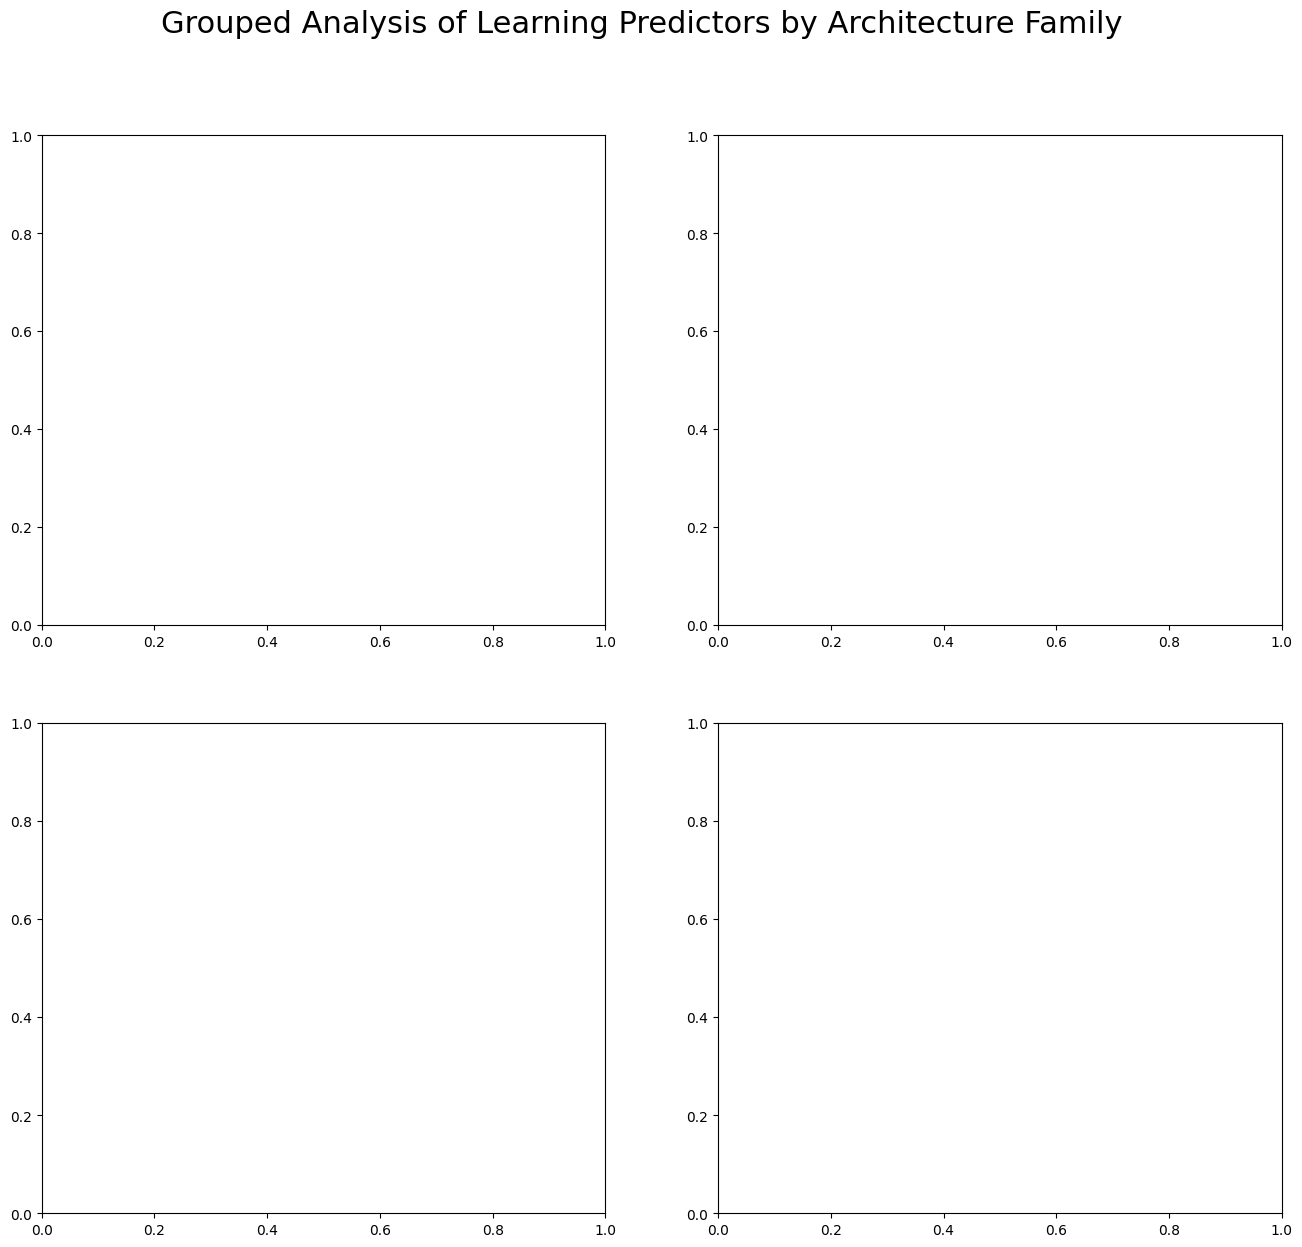

In [4]:
# ===================================================================
# Run a global analysis on a specific set of experiment results
# ===================================================================
RESULTS_DIR_BASE = f"experiment_results_20250704"
RESULTS_FILENAME = f"experiment_results_20250704/results_fixed_panel/results.csv"
final_results_df = pd.read_csv(RESULTS_FILENAME, sep=',', on_bad_lines='warn')
print(f"\n--- Analysis based on {len(final_results_df['run_id'].unique())} total completed runs. ---")
enhanced_statistical_analysis(final_results_df, RESULTS_DIR)